<a href="https://colab.research.google.com/github/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis/blob/main/experiments/covidGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data

In [ ]:
# IMPORT AND MOUNT DRIVE
import tensorflow as tf
import os
import os.path
import sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CLONE GITHUB REPOSITORY
!rm -r "COVID-Chest-X-Rays-Deep-Learning-analysis"
!git clone https://github.com/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis.git

Cloning into 'COVID-Chest-X-Rays-Deep-Learning-analysis'...
remote: Enumerating objects: 814, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 814 (delta 148), reused 97 (delta 47), pack-reused 589
Receiving objects: 100% (814/814), 94.07 MiB | 39.59 MiB/s, done.
Resolving deltas: 100% (411/411), done.


In [ ]:
# LOAD DIRECTORIES
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/models')
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/tools')

In [ ]:
# LOAD TRAINING DATA

from XRaysDataset import XRaysDataset

dataset = XRaysDataset()
train_datasets, training_size = dataset.load()

Training size  3443
Number of batches for the covid dataset: 9
Number of batches for the normal dataset: 9
Number of batches for the viral pneumonia dataset: 9


# Training

In [ ]:
# LOAD MODEL
from covidGAN import covidGAN
covidGAN = covidGAN(n_epochs=800, logging_step=100, generator_lr=1e-4)

covidGAN created


In [ ]:
# set checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/covidGAN'
out_images_path = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/covidGAN/outImages'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(gan_optimizer=covidGAN.gan_optimizer, gan=covidGAN.gan)

# noise used during training in order to evaluate how the network is learning
benchmark_noise = tf.random.normal([covidGAN.batch_size, covidGAN.latent_size])

# train model
covidGAN.train_model(train_datasets[0], training_size, benchmark_noise, checkpoint, checkpoint_prefix)

# Results

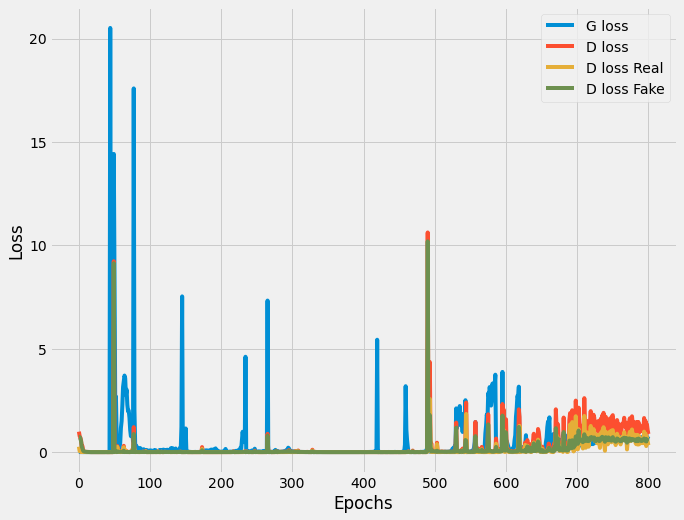

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('fivethirtyeight'):
  covidGAN.plot_losses(covidGAN.history, "Epochs", "Loss")

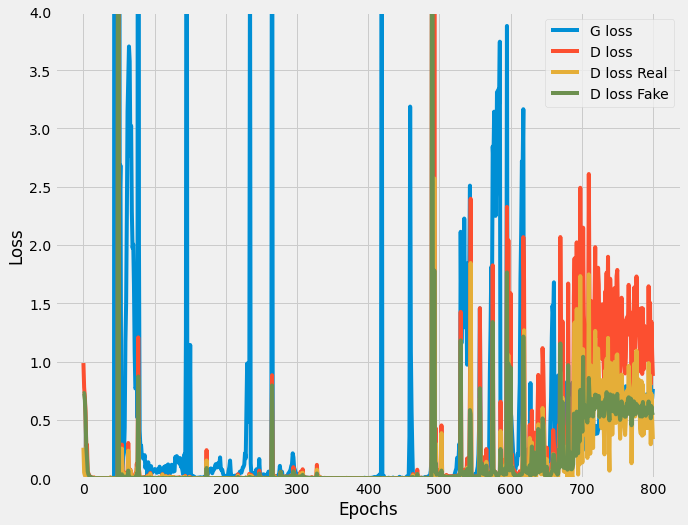

In [ ]:
with plt.style.context('fivethirtyeight'):
  covidGAN.plot_losses(covidGAN.history, "Epochs", "Loss", 4)

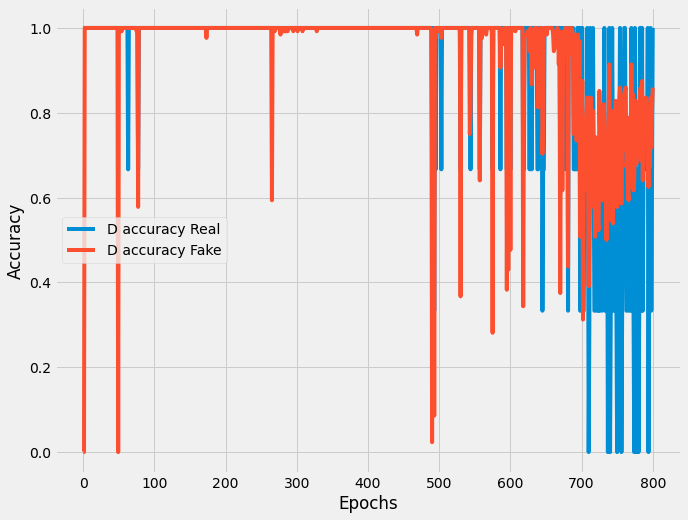

In [ ]:
with plt.style.context('fivethirtyeight'):
  covidGAN.plot_losses(covidGAN.accuracy, "Epochs", "Accuracy")

In [ ]:
from images_to_gif import images_to_gif
images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/covidGAN/outImages/*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/covidGAN/outImages/covidGAN.gif')